<a href="https://colab.research.google.com/github/GyanGartia/Machine-Learning/blob/main/Lab8_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Classification using SVM**

In [ ]:
#importing libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import style
from sklearn.datasets import make_blobs
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler

making data using make_blob

In [ ]:
X, Y = make_blobs(n_samples=100, centers=2, n_features=2, cluster_std = 0.60, random_state=0)

In [ ]:
# print(X)

In [ ]:
Y

array([1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1])

In [ ]:
print(Y)

[1 1 0 0 1 0 0 1 0 1 0 1 0 0 1 1 1 0 1 1 0 0 1 0 1 0 1 0 0 1 1 0 1 1 1 0 1
 1 0 1 0 0 0 0 1 1 1 1 0 0 1 1 0 0 0 0 0 1 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0
 0 0 1 1 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 0 0 1 1 0 1]


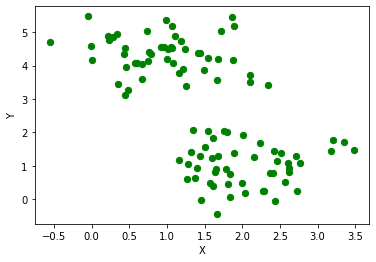

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.scatter(X[:, 0], X[:, 1], s = 40, color = 'g')
plt.xlabel("X")
plt.ylabel("Y")

plt.show()
plt.clf()

building model using linear kernel

In [ ]:
x_train, x_test, y_train, y_test=train_test_split(X, Y, test_size=0.2, random_state=22)

# svc_model = SVC()
svc_model = SVC(kernel='linear')
svc_model.fit(x_train, y_train)

# make predictions
y_pred = svc_model.predict(x_test)

# summarize the fit of the model
print(metrics.classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00         9

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

[[11  0]
 [ 0  9]]


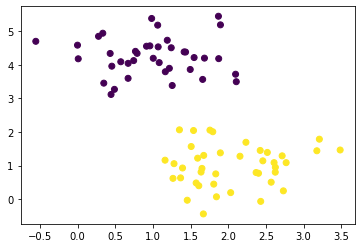

In [ ]:
plt.scatter(x_train[:, 0], x_train[:, 1], c = y_train)

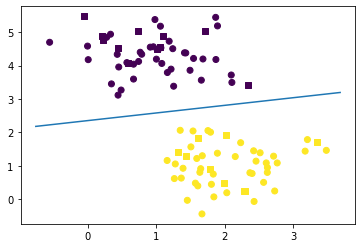

In [ ]:
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train)
ax = plt.gca()
xlim = ax.get_xlim()

ax.scatter(x_test[:, 0], x_test[:, 1], c=y_test, marker = 's')

w = svc_model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(xlim[0], xlim[1])
yy = a * xx - (svc_model.intercept_[0] / w[1])
plt.plot(xx,yy)
plt.show()

building model using rbf kernel

In [ ]:
x_train, x_test, y_train, y_test=train_test_split(X, Y, test_size=0.2, random_state=22)

# svc_model = SVC()
svc_model = SVC(kernel='rbf')
svc_model.fit(x_train, y_train)

# make predictions
y_pred = svc_model.predict(x_test)

# summarize the fit of the model
print(metrics.classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00         9

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

[[11  0]
 [ 0  9]]


SVM ON FOREST FIRE DATASET

In [ ]:
# data = pd.read_csv('forestfires.csv')
data = pd.read_csv('/content/drive/MyDrive/dataset/forestfires.csv')
data = data.dropna()

In [ ]:
data.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [ ]:
# Convert categorical variables (months and days) into numerical values
months_table = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
days_table = ['sun', 'mon', 'tue', 'wed', 'thu', 'fri', 'sat']

data['month'] = [months_table.index(month) for month in data['month'] ]
data['day']   = [days_table.index(day)  for day in data['day']  ]

In [ ]:
data['impact'] = [0 if area == 0 else 1 for area in data['area']]

In [ ]:
inputs = data.drop(['area','impact'], axis=1)
target = data['impact']

In [ ]:
inputs.sample(5)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain
338,8,6,8,1,91.6,108.4,764.0,6.2,22.7,35,2.2,0.0
60,2,2,2,0,89.3,51.3,102.2,9.6,11.5,39,5.8,0.0
302,3,6,5,5,91.1,94.1,232.1,7.1,19.2,38,4.5,0.0
352,7,4,8,5,92.1,99.0,745.3,9.6,20.6,43,3.6,0.0
234,4,5,8,6,92.5,121.1,674.4,8.6,17.7,25,3.1,0.0


In [ ]:
x_train, x_test, y_train, y_test=train_test_split(inputs, target, test_size=0.3)

# svc_model = SVC()
svc_model = SVC(kernel='linear')
svc_model.fit(x_train, y_train)

# make predictions
y_pred = svc_model.predict(x_test)

# summarize the fit of the model
print(metrics.classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.44      0.45      0.44        69
           1       0.55      0.54      0.55        87

    accuracy                           0.50       156
   macro avg       0.49      0.49      0.49       156
weighted avg       0.50      0.50      0.50       156

[[31 38]
 [40 47]]


In [ ]:
x_train, x_test, y_train, y_test=train_test_split(inputs, target, test_size=0.3)

# svc_model = SVC()
svc_model = SVC(kernel='rbf')
svc_model.fit(x_train, y_train)

# make predictions
y_pred = svc_model.predict(x_test)

# summarize the fit of the model
print(metrics.classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.57      0.24      0.34        70
           1       0.58      0.85      0.69        86

    accuracy                           0.58       156
   macro avg       0.57      0.55      0.51       156
weighted avg       0.57      0.58      0.53       156

[[17 53]
 [13 73]]


In [ ]:
#standardization of data
scaler = StandardScaler()

t_df = data.drop(['area', 'impact'], axis =1)

#fitting forest fire dataset to scaler by removing the attribute output
scaler.fit(t_df)

scaled_features = scaler.transform(t_df)
# scaled_features = scaler.transform(data.drop('area',axis=1))
inputs = pd.DataFrame(scaled_features,columns=data.columns[:-2])
inputs.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain
0,1.008313,0.569860,-1.968443,0.946441,-0.805959,-1.323326,-1.830477,-0.860946,-1.842640,0.411724,1.498614,-0.073268
1,1.008313,-0.244001,1.110120,-0.454255,-0.008102,-1.179541,0.488891,-0.509688,-0.153278,-0.692456,-1.741756,-0.073268
2,1.008313,-0.244001,1.110120,1.413339,-0.008102,-1.049822,0.560715,-0.509688,-0.739383,-0.692456,-1.518282,-0.073268
3,1.440925,1.383722,-1.968443,0.946441,0.191362,-1.212361,-1.898266,-0.004756,-1.825402,3.233519,-0.009834,0.603155
4,1.440925,1.383722,-1.968443,-1.388053,-0.243833,-0.931043,-1.798600,0.126966,-1.291012,3.356206,-1.238940,-0.073268


In [ ]:
x_train, x_test, y_train, y_test=train_test_split(inputs, target, test_size=0.3)

# svc_model = SVC()
svc_model = SVC(kernel='linear')
svc_model.fit(x_train, y_train)

# make predictions
y_pred = svc_model.predict(x_test)

# summarize the fit of the model
print(metrics.classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.58      0.23      0.32        80
           1       0.50      0.83      0.63        76

    accuracy                           0.52       156
   macro avg       0.54      0.53      0.48       156
weighted avg       0.54      0.52      0.47       156

[[18 62]
 [13 63]]


In [ ]:
x_train, x_test, y_train, y_test=train_test_split(inputs, target, test_size=0.3)

# svc_model = SVC()
svc_model = SVC(kernel='rbf')
svc_model.fit(x_train, y_train)

# make predictions
y_pred = svc_model.predict(x_test)

# summarize the fit of the model
print(metrics.classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.55      0.55      0.55        71
           1       0.62      0.62      0.62        85

    accuracy                           0.59       156
   macro avg       0.59      0.59      0.59       156
weighted avg       0.59      0.59      0.59       156

[[39 32]
 [32 53]]
